# Prediction using Decision Tree Algorithm

### Problem Statement:
**To understand the working of a decision tree and try to visualize the decision tree and to predict the values in the given iris dataset.**

**The algorithms that I will be using are:**

1. Decision Tree Algorithm
2. Random Forest Alogorithm

**Importing the necessary packages:**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

### Loading the Dataset:

In [2]:
df = pd.read_csv('Iris_2.csv')
df.drop(['Id'], axis = 1, inplace = True)
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Visualizing the given data:

We will plot the following graphs for visualization:

1. Pair Plot
2. Heatmap
3. Boxplot


<Figure size 288x288 with 0 Axes>

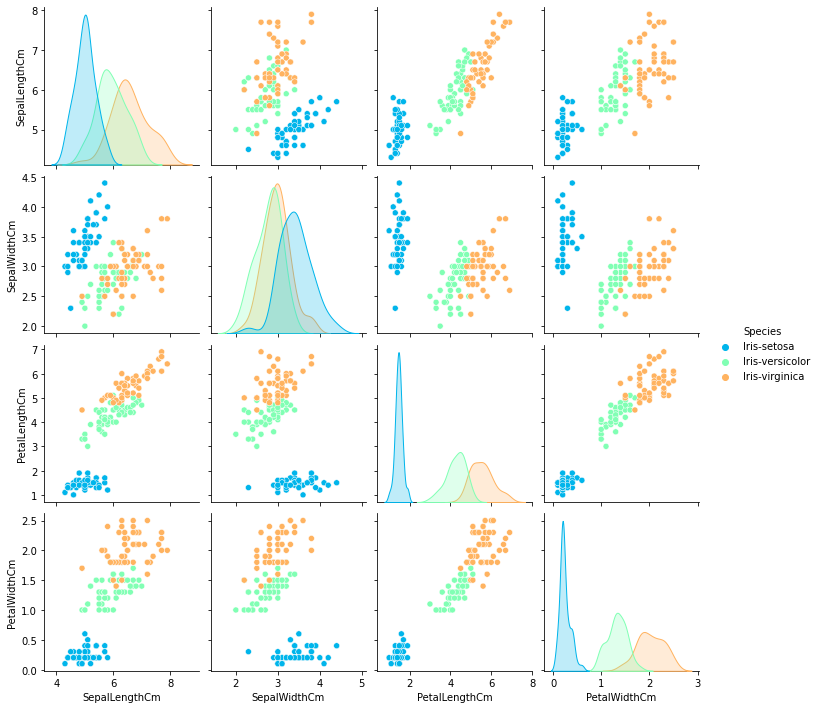

In [3]:
plt.figure(figsize = (4, 4))
sns.pairplot(df, hue = 'Species', palette = 'rainbow')
plt.show()

[]

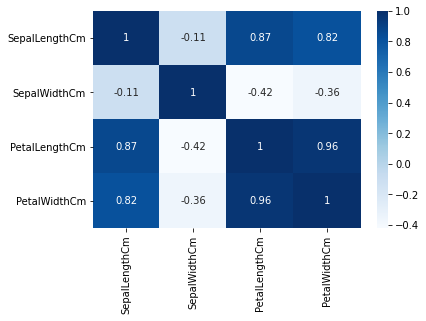

In [4]:
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)
plt.plot()

**Trying to figure out the realtion in the given data and looking for outliers in the dataset.
We can see below there are a few outliers in our dataset.**

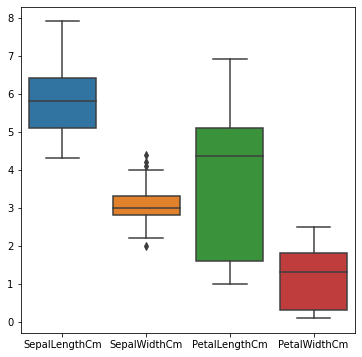

In [5]:
plt.figure(figsize = (6, 6))
sns.boxplot(data = df.iloc[:, 0:4])
plt.show()

### Preparing the data for training our model:

In [6]:
convert = list(df["Species"])
for i in range(len(convert)):
    if convert[i] == 'Iris-setosa':
        convert[i] = 0
    elif convert[i] == 'Iris-versicolor':
        convert[i] = 1
    elif convert[i] == 'Iris-virginica' :
        convert[i] = 2

x = df.iloc[:, 0:4]
y = convert

### Training and Testing our Model:

Import **train_test_split** to split the data for training and testing split the data in 80/20 proportion, import the **DecisionTreeClassifier** from sklearn and train the model by feeding it the training data.

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)


pred = dtree.predict(x_test)


comp = pd.DataFrame({'Original':y_test, 'Predicted':pred})
comp['Diff'] = comp['Original'] - comp['Predicted']

acc = dtree.score(x_test, pred)
print('\nThe accuracy of the classifier is:', acc)
comp.head()


The accuracy of the classifier is: 1.0


,Original,Predicted,Diff
0,2,2,0
1,1,1,0
2,0,0,0
3,2,2,0
4,0,0,0


### Visualizing the Decision Tree:
One of the most important step to understand the working of a decision tree, the visualization will be done using the following packages:
``` python
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
```
Make sure that you have insatlled all the packages before importing them.

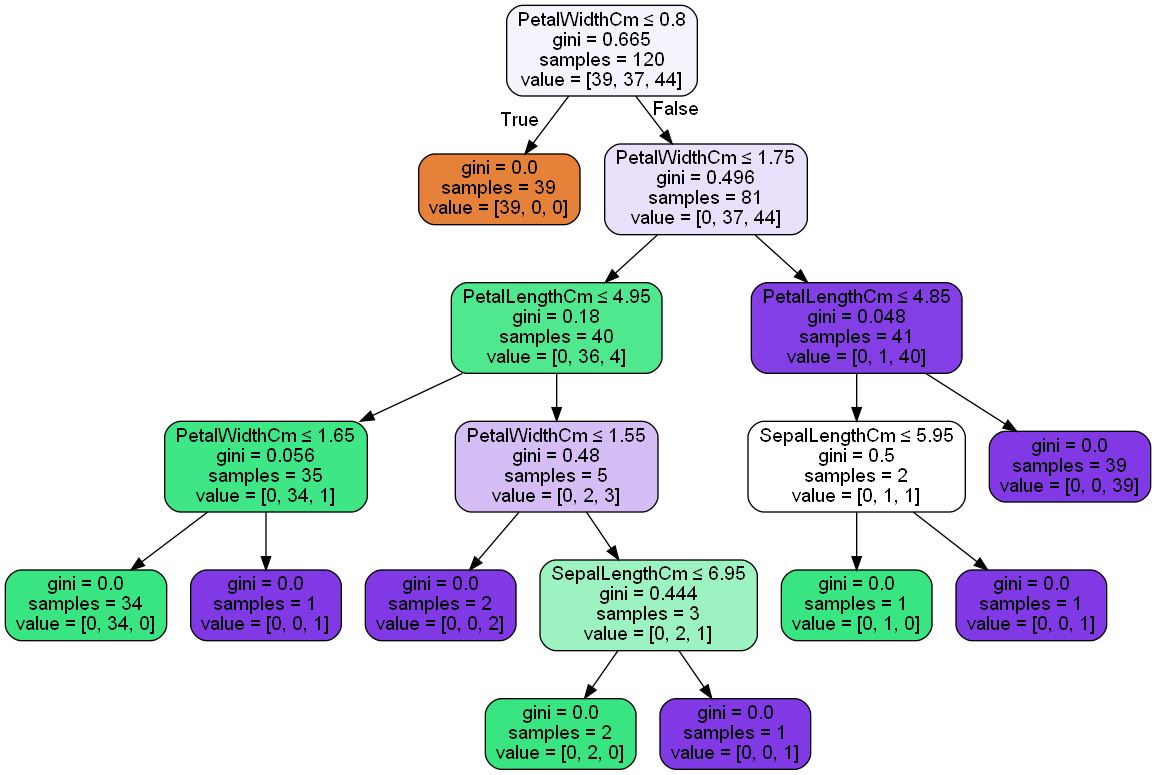

In [8]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz/bin/'

from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=df.columns[0:4],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Implementing our 2nd Algorithm:

**RandomForestClassifier** is basically a group of decision trees making predictions for a particular test case and then the answer given by majority of the trees is considered to be the right answer. A RandomForest is better than a single DecisionTree and is used for large data.

Importing the **RandomForestClassifier** from sklearn and training and testing the model using the data prepared before.

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
classifier = RandomForestClassifier(n_estimators=10)
classifier.fit(x_train, y_train)

pred = classifier.predict(x_test)
#print(pred)

comp = pd.DataFrame({'Original':y_test, 'Predicted':pred})
comp['Diff'] = comp['Original'] - comp['Predicted']

score = classifier.score(x_test, pred)

print('\nThe accuracy of the classifier is:', score)
comp.head()


The accuracy of the classifier is: 1.0


,Original,Predicted,Diff
0,2,2,0
1,1,1,0
2,0,0,0
3,2,2,0
4,0,0,0


### Visualizing one of the Decision Tree created by the Random Forest:
Similar to the visualization of the decision tree the same packages are used to visualize the Tree. Reference was taken from [here](https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c) to visualize the tree.

In [11]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz/bin/'
estimator = classifier.estimators_[2]
from sklearn.tree import export_graphviz
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = df.iloc[:,0:4].columns,
                class_names = df.iloc[:, 4],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree.png')

### Conclusion:

**As we can see in the visualization of the decision trees the two displayed decision trees have different ways to classify the data but they both successfully classify the data.**